<a href="https://colab.research.google.com/github/Owlmanandy/ATMS-421-Projects/blob/master/ESM_Module_5_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Earth Systems Modeling</h1>
<h2>Module 5: Higher Order Finite Difference Approximations and Model Evaluation<br>
    Lab 5: The  [25 pts]</h2>
<blockquote>“Those who can imagine anything, can create the impossible.” ― Alan Turing</blockquote>

<h3>Part 1: The Runge-Kutta Methods</h3>
<p>In Module 3, we introduced the box model formalism (the is the foundation of so-called Eulerian models in the Atmospheric Sciences). We learned that this approach to modeling can be scaled from a single box representing a lake upward to an N x N X N array (grid) of boxes (or other shapes) encompassing the entire lake. We also used a {\em finite difference approximation} to solve the Verhulst population relation and extended this approximation to a more complicated representation of fish in Lake Michigan.  Recall the Verhulst rate relation</p>

  \begin{equation}
  \frac{dx(t)}{dt} = r x(1 - \frac{x}{K})
  \end{equation}
<p>Where $x$ represents the population, $r$, the birthrate constant, and $K$, the carrying capacity. Although the rate of population change described by the Verhulst relation does not explicitly depend on time, $x$ is time dependent. We will at some point in the future examine box models with time dependent rates, so it is important in this lesson that we consider time when describing our simulation tools.  For your future reference, the analytical solution to the Verhulst relation may be written as: \\

  \begin{equation}
  x(t) = \frac{K}{1 + (K/x_0 - 1) e^{-r t}}
  \end{equation}

<p>In this exercise we will work on expanding our simulation tools and include some rudimentary evaluation techniques. As stated previously, the first-order Explicit Euler Method can be derived from a Taylor series expansion. Let $f(p | t, x)$ represent a generic time dependent function with parameters decribed by p, and variable x. Note that x could be a collection of variables, and that we have been working with the example of population up until now.</p>
<p>
Any function $f(p | t, x)$ that is infinitely differentiable can be expanded around a given point. In this example, we will expand around time, $t = t + \Delta t$, using the Taylor Series expansion as follows. </p>
  \begin{equation}
  f(p | t + \Delta t, x) = f(p | t, x)  + f'(p | t, x)\Delta t + \frac{f''(p | t , x)}{2!}(\Delta t)^2 + \frac{f'''(p | t , x)}{3!}(\Delta t)^3 + O(\Delta t^4)
  \end{equation}

<p>If we used the terms written in the Taylor Series expansion above, we would be using a third-order approximation because we are throwing out the fourth-order and higher order terms as represented with the Landau symbol $O(\Delta t^4)$. Here we have a zero-order term $f(p | t , x)$, first order term $f'(p | t , x)(\Delta t)$, and so forth.  (For those confused, the term $f'(p | t , x)$ represents the first time derivative of $f(p | t, x)$.</p>

<p>The first-order finite difference is often referred to as the "Explicit Euler Method" or "Forward Euler Method". Let us briefly review this approximation. First we note that our population, $x(t)$ is our function $f(p | t , x)$, while our rate of population change, $\frac{dx(t)}{dt}$, is what we call our function, $f'(p | t , X)$\\

  \begin{equation}
  X(t) = f(t,p,X(t))
  \end{equation}

  \begin{equation}
  \frac{dX(t)}{dt} = f'(t,p,X(t))
  \end{equation}

<p>Above we want to determine a solution, $x(t)$, for our ODE. Again, the term $f(p | t , x(t))$ denotes a function written in terms of time, t, parameters, p, and with a dependency on a time dependent variable, such as population. We can approximate the derivative $dx/dt$ using the approximate slope of a given value for X as follows.</p>

  \begin{equation}
  \frac{dX(t)}{dt} ~= \frac{X(t + \Delta t)-X(t)}{\Delta t}
  \end{equation}

<p>Again, the smaller the $\Delta t$ the better the approximation, and of course this is dependent upon the system you are modeling.  {\bf Challenge:} see if you can derive equation (6) from the Taylor Series expansion. As we saw in class, we can rewrite the above equation in terms of $f(p | t , x(t))$, and solve for $x(t + \Delta t)$.</p>

  \begin{equation}
  x(t + \Delta t) ~= x(t) + f'(p | t , x(t))\Delta t 
  \end{equation}

<p>As we saw previously, we can iterate over time to build our solution, x(t).</p>

  \begin{equation}
  x(t_1) = x(t_0 + \Delta t) = x(t_0) + f'(p | t_0, X(t_0))\Delta t
  \end{equation}
  
  \begin{equation}
  x(t_2) = x(t_1 + \Delta t) = x(t_1) + f'(p | t_1, X(t_1))\Delta t
  \end{equation}
  
  \begin{equation}
  x(t_{i+1}) = x(t_i + \Delta t) = x(t_i) + f'(p | t_i, X(t_i))\Delta t
  \end{equation}

<p>Previously, we used the following notation for the latter expression:</p>

  \begin{equation}
  x[i+1] = x[i] + f'(p, t, X[i])\Delta t 
  \end{equation}

<p>where $f'(p, t, X[i])$ was our Verhulst rate equation. Solving for x(t), either analytically or in this iterative fashion, requires that we have initial conditions: a defined initial time, $t_0$, and an initial value of our variable, $x(t_0)$.  We then will update our equation until we reach our final time, $t_f$. When using a first-order finite difference method, such as the explicit Euler method, we are only using the first-order terms of our Taylor Series expansion of $f(t,p,X(t))$. This means that the error in each step of our simulation is proportional to $(\Delta t)^2$. Since the number of steps taken is proportional to $1/\Delta t$, the global error of the Euler method is $(\Delta t)^2$ x $\frac{1}{\Delta t}$ or $\Delta t$. First-order methods are not very accurate in long-term simulations, which is why several other methods for computing higher-order solutions exist.  We will describe one such method in the following part.</p>

<p>The Runga-Kutta approximation was developed to solve ODEs around 1900 by German mathematicians Runge and Kutta.  Such methods are more precise because they utilize values "between" each time step rather than the initial timestep values or values coincident with the begining of the time step. The accuracy comes from using an average value for the entire time interval,  $\Delta t$, rather than the initial value. This has the effect of cancelling out the first-order error terms. Let's start with the second order Runga-Kutta approximation as an illustration.</p>

  \begin{equation}
  k_1 = f'(p | t_i, x_i)\Delta t 
  \end{equation}
  
  \begin{equation}
  k_2 = f'( p | t_i + \frac{\Delta t}{2}, x_i + \frac{k_1}{2})\Delta t 
  \end{equation}
  
  \begin{equation}
  x_{i+1} = X_i + k_2 + O(\Delta t^3) 
  \end{equation}

<p>As indicated in the error term above, our first-order error has cancelled out in our approximation, leaving second-order error. Notice the recursive appearance of equation (14), which relies on equations (12 and 13).  This requires a bit more care when encoding for our simulations. The derivation of this technique is a bit more complicated, it involves finding a better approximation of you $f'(t, p, X)$ rather than taking on more terms from the Taylor's expansion.</p>


<h4>Question 1.1: Lower-Order Solutions to the Verhulst Logistic Population Model</h4><br/>
<p>Now we will take a closer look at the finite difference approximation and numerical error. Your first task is to write two functions representing the Explicit Euler Method and the Midpoint Method (a second-order Runge-Kutta method). These will be applied to the Verhulst population model in Question 1.2.</p>
<br/>
Hint: You'll want to create two python functions, one for the Verhulst equation, and one for your numerical integrator. Your function for the Verhulst equation should have the parameters of population, rate constant, and carrying capacity.

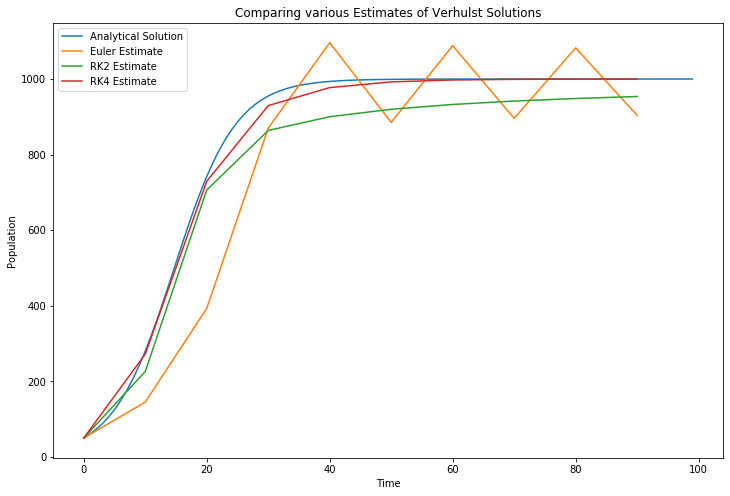

wow


In [0]:
import numpy as np
import matplotlib.pyplot as plt

#These functions all give the number of fish at a time; we're comparing two different estimation methods with the analytical solution of the equation
#param = initial condition, rate, carrying capacity
#param = [x0, r, k]

def verhulst_soln(param, t): #tells us how many fish at a given time
  x0 = param[0]
  r = param[1]
  K = param[2]
  return K/(1+((K-x0)/x0)*np.exp(-r*t))

def verhulst_rate(r, k, x): #this will become my_func which is in k1 and k2, works with the analytical solution,
  r = param[1]
  k = param[2]
  return r*x*(1-x/k) #this tells us the rate of change in fish population at a given point

def euler(my_func, param, sim_time, timestep):
  # Initializing our solution array
  x0 = param[0]
  r = param[1]
  k = param[2]

  n = int(np.ceil(sim_time/timestep)) 
  pop = np.zeros([n,2]) # I am initializing my array
  pop[0,0] = 0 # This is my time column
  pop[0,1] = x0
  
  for i in range(n-1):
    k1 = my_func(param, pop[i,0], pop[i,1])*timestep #pop[i,0] is the time, pop[i,1] is x. f(param,t,x)
    pop[i+1,1] = pop[i,1] + k1 #this is first order, the forward
    pop[i+1,0] = pop[i,0]+timestep
    pop_euler = pop
  
  return pop_euler #this is just a more error way to find population

def rk2(my_func, param, sim_time, timestep):
  x0 = param[0]
  r = param[1]
  k = param[2]

  # Initializing our solution array
  n = int(np.ceil(sim_time/timestep)) 
  pop = np.zeros([n,2]) # I am initializing my array
  pop[0,0] = 0 # This is my time column
  pop[0,1] = x0
  
  for i in range(n-1):
    k1 = my_func(param, pop[i,0], pop[i,1])*timestep #pop[i,0] is the time, pop[i,1] is x. f(param,t,x)
    k2 = my_func(param, pop[i,0]/2., pop[i,1] + k1/2.)*timestep #if you remove k2 and replace adding k2 with k1, you can make it a forward (?) euler method.
    pop[i+1,1] = pop[i,1] + k2 #this is second order illusion, RK2, the midpoint method
    pop[i+1,0] = pop[i,0]+timestep
    pop_rk2 = pop

  return pop_rk2 #this is just a more accurate/less error way to find population

def rk4(my_func, param, sim_time, timestep):
  x0 = param[0]
  r = param[1]
  k = param[2]

  # Initializing our solution array
  n = int(np.ceil(sim_time/timestep)) 
  pop = np.zeros([n,2]) # I am initializing my array
  pop[0,0] = 0 # This is my time column
  pop[0,1] = x0
  
  for i in range(n-1):
    k1 = my_func(param, pop[i,0], pop[i,1])*timestep #pop[i,0] is the time, pop[i,1] is x. f(param,t,x)
    k2 = my_func(param, pop[i,0] + timestep/2, pop[i,1] + k1/2)*timestep
    k3 = my_func(param, pop[i,0] + timestep/2, pop[i,1] + k2/2)*timestep
    k4 = my_func(param, pop[i,0] + timestep, pop[i,1] + k3)*timestep
    pop[i+1,1] = pop[i,1] + k1/6 + k2/3 + k3/3 + k4/6 #this is fourth order illusion, RK4, less error
    pop[i+1,0] = pop[i,0]+timestep
    pop_rk4 = pop

  return pop_rk4 #this is just a more accurate/less error way to find population

t = np.arange(100)
param = [50, 0.2, 1000]
sim_time = 100
timestep = 10

model_sol = verhulst_soln(param, t)  #can plot this against the model time, using model_euler[:,0],model_sol[:]
model_euler = euler(verhulst_rate,param,sim_time,timestep)
model_rk2 = rk2(verhulst_rate,param,sim_time,timestep)
model_rk4 = rk4(verhulst_rate,param,sim_time,timestep)

fig,ax = plt.subplots(1,figsize=(12,8))
ax.plot(t,model_sol[:],label='Analytical Solution')
ax.plot(model_euler[:,0],model_euler[:,1],label='Euler Estimate')
ax.plot(model_euler[:,0],model_rk2[:,1],label='RK2 Estimate')
ax.plot(model_euler[:,0],model_rk4[:,1],label='RK4 Estimate')
ax.legend()
ax.set_title('Comparing various Estimates of Verhulst Solutions')
ax.set_xlabel('Time')
ax.set_ylabel('Population')
plt.show()
print('wow')

<h4>Question 1.2: Compare the performance of the midpoint method as compared to the explicit Euler method.</h4>
<p>Use the Verhulst rate equation for your comparison and select your favorite values for the birthrate constant, $r$, and carrying capacity, $K$, and be sure to calculate the analytical solution for your timesteps.</p>
<p>Plot the two numerical solutions and the analytical solution together. Be sure to use a timestep that exagerates the difference between the numerical solutions. Your plot should include a legend, axes labels, and a title.</p>

In [0]:
#This is done in the graph above, for question 1.1

<h3>Part 2: The Fourth-Order Runga Kutta Method</h3>

<p>Fourth-order Runge Kutta methods are more commonly used, and are sometimes referred to as RK4 methods.  According to {\em Numerical Recipes in C} this method a "workhorse" of scientific computing. There are a few ways to derive an RK4 method, and the more common method is below. There is serious divergence amongst the RK6 methods, which frequently have customization based on the type of differential equations solved.</p>

  \begin{equation}
  k_1 = f'(p | t_i, x_i)\Delta t
  \end{equation}
  
  \begin{equation}
  k_2 = f'( p | t_i + \frac{\Delta t}{2}, x_i + \frac{k_1}{2})\Delta t
  \end{equation}
  
  \begin{equation}
  k_3 = f'(p | t_i + \frac{\Delta t}{2},  x_i + \frac{k_2}{2})\Delta t
  \end{equation}
  
  \begin{equation}
  k_4 = f'(p | t_i + \Delta t, x_i + k_3)\Delta t
  \end{equation}

  \begin{equation}
  x_{i+1} = x_i + \frac{k_1}{6} + \frac{k_2}{3} + \frac{k_3}{3} + \frac{k_4}{6} + O(\Delta t^5) 
  \end{equation}\\

<p>So what do these k values above represent?  In the explicit Euler method, we used our initial values to compute the midpoint value of $x_i$ in order to compute $x_{i + 1}$. In our higher-order RK2 method, we are now using our initial values to calculate a more accurate midpoint that also takes into consideration the value at the end of the interval $(k_4)$. What order approximation is the RK4 method?</p>


<h4>Question 2.1: RK4 vs. Lower-Order Solutions to the Verhulst Logistic Population Model</h4>
<p>Make another python function for the fourth-order Runge-Kutta approximation. Again, compare this higher-order method to the second-order approximation, the euler approximation and the analytical values by making a plot.
(See https://en.wikipedia.org/wiki/Logistic_function application to ecology).  You may need to use several time longish steps to visualize the accumulation of error with time.</p> 

In [0]:
#This is also done in the 1.1 graph above.

<h4>Question 2.2: Benchmarking Your Solvers.</h4>
<p>Make a list or an ndarray of 5 to 8 time-steps that vary by a five orders of magnitude. We are going to do some benchmarking calculations in our final analysis. The goal is to recreate something like Table 4 found in <a href="https://arxiv.org/pdf/1610.09739.pdf">"RKFD Methods - a short review" by Maciej Jaromin</a>, a document also available on our Moodle website.</p>

<p>To make a table benchmarking your code with your variable time-steps, please refer to the website <a href="https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html">Profiling and Timing Code</a>.  You'll need to create loops to run your program a few times and to calculate the average cpu time to complete your code. This will be a useful skill to develop for down the road as you may wish to optimize the computational efficicency your calculations.</p>

In [0]:
#I don't really have the time to actaully write this code out, but I suspect it would look something like this:
#Create a list with values like timestep = [1,0.1,0.01,0.001,0.0001,0.00001]
#Use a for loop with i being each value in the timestep list.  IN the forloop, call the RK4 equation that I wrote above.  Also call the
#analytical solution to the verhulst equation.  Create an array for each equation with each timestep provided.
#Compare these arrays to determine the error between the RK4 equation and the Verhulst equation.
#Use a magic command (I think %timeit before the forloop might work, or %prun or %lprun) to measure the time it takes to complete the operation
#This should produce the results that we're looking for, especially if I return the error and the time.  Hopefully this is alright

In [0]:
import numpy as np
import pandas as pd

table = np.zeros((7,5))
a = 'hey','you','guys','hey2','you2'
b = [10,1,0.1,0.01,0.001,2,3]
df = pd.DataFrame(table, columns=a)
df['hey'] = b

dang = [1,2,3,5,7,12,15]
number = np.zeros(7)
for i in range(len(dang)):
  number[i] = dang[i] + 5

number1 = []
for i in dang:
  number1.append(i+5)

print(number1)

# df['you']=number
# df

[6, 7, 8, 10, 12, 17, 20]



<h4>Question 2.3: Building an Understanding of ODE Finite Difference Solvers.</h4>
<p>Make a statement about the numerical error you observe. Do you notice a systematic underestimate for the explicit Euler method? What is different in the midpoint or RK4 methods? Do you think the error in our box model of coho salmon in Lake Michigan was likely to be acceptable based on your comparison of the three approximations and time steps used?</p>

YOUR ANSWER

Comparing the graphs that I produced above in part 1.1, I find that the Euler method does, overall, have a systematic underestimate, but also that it is quite spiky and unstable at large timesteps.  At smaller timesteps it is more stable, but still underestimates the equations in general.  The RK2 method also has a pretty regular underestimate of the true value, at least at this timestep.  However, based on the link provided in 2.2 and the data that I gathered from comparing the different methods, RK4 has a pretty small margin of error compared to the other methods, and this margin of error decreases further as the timestep gets smaller.  I think that our error in our box model shouldn't be too bad, should be in the acceptable range.  However, it will underestimate the true predicted values, since it uses a forward euler method, and if we were to use RK4 and integrate that into our model, then our model would have less error.

<h3>Final Reflection</h3>
<p>A very short week! This time around, in addition to the points below, consider how you would integrate the RK4 approach with your fish model. What would need to be rewritten? As, always, in your reflection, you should:</p>

<ul><li>Reflect! Consider and then comment on what you have learned in this lab. Connect the ideas to your own interests and experiences of the world.</li>
<li>Be sure to comment on what you found challenging and what you found intuitive.</li>
<li>Add some constructive criticism.</li>
</ul>

In [0]:
#If I were to integrate the RK4 approach into the Coho Salmon model, I imagine that I wouldn't have to change too much or rewrite very much.
#I'd probably just have to redo the part at the end, where we actually add the values to the array.  The part that's like pop[i,1] +pop[i+1,1].
#that would be easy enough to do, I'd just have to add a couple extra lines of code to create some more values to add and then add them to the
#next population value.  I think it would be just like the k1,k2,k3,k4 stuff that we have in the code above.  Although I could be wrong about this
#and it may be more difficult to add the RK4 method into the salmon model than I expected.  But I don't think it would be, RK4 seems pretty useful
#and fairly straightforward.  I feel like I've learned a lot this week and I'm also at the point in the class where things are making sense
#and I can learn the labs and do the class material without feeling lost and confused and overly stressed.  I'm looking forward to the 
#creationg of the other models in class, especially the ocean circulation one.  Or wait did we decide not to do that one?  I wish we could do the
#volcanic plume one, that one seems like a lot of fun.  But I also like the thermohaline circulation one, too, especially since it would go well
#with what I learned in ATMS 140.  Though I suspect that the ice sheet models could be interesting, too.  Though what about them would we be
#modelling?  Growth rates or change rates in the ice sheets?  Ice cover on the ocean?  I'm not sure.  Might be interesting either way, though.
#I found this lab to be pretty intuitive, as far as the coding goes, but some of the actual math is a bit more challenging.  I haven't taken a
#calculus class for a while so some of the materaial has gone over my head, but I understand the coding part decently well so I have that much
#at least.